데이터 출처 링크 : https://github.com/bab2min/corpus/tree/master/sentiment

In [106]:
import re
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

import urllib.request
from collections import Counter


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [107]:
# 전체 데이터에 해당하는 naver_shopping.txt 다운로드 하기
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/naver_shopping.txt", filename="naver_shopping.txt")

('naver_shopping.txt', <http.client.HTTPMessage at 0x7a18c18e7640>)

In [108]:
pd.read_table('naver_shopping.txt')

,5,배공빠르고 굿
0,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
1,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
2,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
3,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
4,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
...,...,...
199994,2,장마라그런가!!! 달지않아요
199995,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199996,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199997,5,넘이쁘고 쎄련되보이네요~


In [109]:
pd.read_table('naver_shopping.txt', names = ['ratings', 'reviews'])


,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [110]:
total_data = pd.read_table('naver_shopping.txt', names = ['ratings', 'reviews'])
total_data.head()


,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [111]:
print('전체 리뷰 수: ', len(total_data))

전체 리뷰 수:  200000


In [112]:
total_data.columns

Index(['ratings', 'reviews'], dtype='object')

In [113]:
total_data['ratings'].value_counts()

ratings
5    81177
2    63989
1    36048
4    18786
Name: count, dtype: int64

훈련용 데이터와 테스트 데이터 분리

In [114]:
#점수가 3이상이 긍정
condition = (total_data.ratings > 3)
total_data[condition]

,ratings,reviews
0,5,배공빠르고 굿
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
10,5,사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ
14,5,촉감도 좋고 무게감이나 핏도 편합니다
...,...,...
199994,4,전반적으로 어플이나 각종 IOT서비스와의 완성도는 좋음 그러나 서버의 잦은 다운과 ...
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [115]:
#np.select(condition. choice, default=0)
# >> condition(긍정) 조건이 참 (True = 1) choice, 그렇지 않으면 dafault(기본값)0
#긍정(평점이 4점,5점) >> 1, 부정 (평점이 1점, 2점) >> 0

np.select([total_data.ratings > 3], [1], default = 0)

array([1, 0, 1, ..., 1, 1, 1])

In [116]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default = 0)
total_data.head()

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [117]:
#각 열에 대해서 중복 제외 샘플 카운팅 하기

total_data['ratings'].nunique()

#1,2,4,5

4

In [118]:
total_data['reviews'].nunique() # 중복있음

199908

In [119]:
total_data['label'].nunique()


2

In [120]:
#drop_duplicates()

total_data.drop_duplicates(subset = ['reviews'], inplace = True)

In [121]:
print('리뷰수 :', len(total_data))

리뷰수 : 199908


In [122]:
#결측치 확인
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199908 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  199908 non-null  int64 
 1   reviews  199908 non-null  object
 2   label    199908 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [123]:
total_data.isnull().sum().values.any()

False

In [124]:
#훈련용 데이터 : 테스트 데이터 3:1
train_data, test_data = \
train_test_split(total_data, test_size=0.25, random_state=42)

In [125]:
print('훈련용 리뷰의 개수: ', len(train_data))
print('평가용 리뷰의 개수: ', len(test_data))


훈련용 리뷰의 개수:  149931
평가용 리뷰의 개수:  49977


In [126]:
#모델링 train_data

train_data.head()

,ratings,reviews,label
59666,2,사이즈를 3센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많...,0
12433,2,ㅂ불만족.. 빗이 아픔 .. 멍이피부에 빗질못해주겟네요,0
146516,1,이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요. 혹시나해서 다시 빼보니 물이 다시 ...,0
158109,5,적당하고 만족합니다,1
70219,2,편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요,0


In [127]:
#EDA(탐색적 데이터 분석)

train_data['label'].value_counts()

label
1    75013
0    74918
Name: count, dtype: int64

<Axes: xlabel='label'>

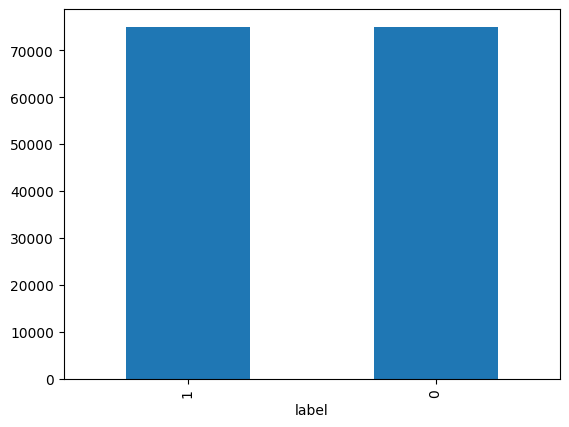

In [128]:
train_data['label'].value_counts().plot(kind = 'bar')


In [129]:
train_data.groupby('label').size()


label
0    74918
1    75013
dtype: int64

In [130]:
train_data.groupby('label').size().reset_index(name = 'count')


,label,count
0,0,74918
1,1,75013


실전 모델링_딥러닝 활용 감성분석

In [131]:
!pip install transformers

In [132]:
#허깅페이스 모델 예제
# https://huggingface.co/matthewburke/korean_sentiment?text=I+like+you.+I+love+you

from transformers import pipeline
classifier = pipeline("text-classification", model="matthewburke/korean_sentiment")
custom_tweet = "영화 재밌다."
preds = classifier(custom_tweet, return_all_scores=True)
is_positive = preds[0][1]['score'] > 0.5


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [133]:
print('긍정 여부: ', is_positive)

긍정 여부:  True


In [134]:
print('스코어 점수 :', preds[0][1]['score'])

스코어 점수 : 0.9731518626213074


In [135]:
# 평가용 데이터 (test_data)

test_data.head(3)

,ratings,reviews,label
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0
125080,1,피부에 뾰루지가 많이 올라와요,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1


In [136]:
def pred_sentiment(text):
    preds = classifier(text, return_all_scores=True)
    if preds[0][1]['score'] > 0.5:
        print('스코어 점수 :', preds[0][1]['score'])
        return 1
    else:
        return 0



In [137]:
text = '''
배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요
'''

In [138]:
pred_sentiment(text)

스코어 점수 : 0.9706684350967407


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


1

In [139]:
#test_data 상위 1,000개만 복사 (처음에)

test_data_sample = test_data[:1000].copy()

In [140]:
test_data_sample

,ratings,reviews,label
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0
125080,1,피부에 뾰루지가 많이 올라와요,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1
72927,5,재구매입니다. 핏도 좋고 착용감도 좋습니다.,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0
...,...,...,...
148745,4,좋아요 딱 맞아요 배송 일주일,1
138045,5,빨간색 검은색 샀어요 있는 것만으로도 든든하네요 잘 쓸께요,1
160462,5,설치 꼼꼼하게 잘해주셨고~ 저렴한 가격에 잘 설치했어요,1
24513,5,마블 구매했다가 품절이라 그레이로 변경했는데 그레이도 넘 이쁘네여~! 가격도 저렴하...,1


In [141]:
# from tqdm import tqdm
# tqdm.pandas()

test_data_sample['pred'] = test_data_sample['reviews'].progress_apply(pred_sentiment)

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
  0%|          | 5/1000 [00:00<01:24, 11.78it/s]

스코어 점수 : 0.9706684350967407
스코어 점수 : 0.9719005823135376


  1%|          | 9/1000 [00:00<01:36, 10.23it/s]

스코어 점수 : 0.9724203944206238
스코어 점수 : 0.8880673050880432


  1%|          | 12/1000 [00:01<01:53,  8.74it/s]

스코어 점수 : 0.973254382610321
스코어 점수 : 0.9729332327842712


  1%|▏         | 14/1000 [00:01<01:51,  8.85it/s]

스코어 점수 : 0.9689388275146484


  2%|▏         | 17/1000 [00:01<01:53,  8.67it/s]

스코어 점수 : 0.9721102714538574


  2%|▏         | 21/1000 [00:02<01:41,  9.67it/s]

스코어 점수 : 0.9506959319114685
스코어 점수 : 0.9650529623031616


  2%|▏         | 24/1000 [00:02<01:40,  9.74it/s]

스코어 점수 : 0.9718542695045471
스코어 점수 : 0.9617008566856384


  3%|▎         | 28/1000 [00:02<01:36, 10.08it/s]

스코어 점수 : 0.9742065072059631
스코어 점수 : 0.9684004187583923


  3%|▎         | 32/1000 [00:03<01:57,  8.25it/s]

스코어 점수 : 0.9724739789962769


  3%|▎         | 34/1000 [00:03<01:45,  9.12it/s]

스코어 점수 : 0.9732511043548584
스코어 점수 : 0.9739761352539062


  4%|▎         | 35/1000 [00:03<02:27,  6.54it/s]

스코어 점수 : 0.9712572693824768


  4%|▎         | 37/1000 [00:04<02:43,  5.89it/s]

스코어 점수 : 0.9599170684814453
스코어 점수 : 0.9750922918319702


  4%|▍         | 39/1000 [00:04<02:43,  5.87it/s]

스코어 점수 : 0.9726884365081787


  4%|▍         | 40/1000 [00:04<02:55,  5.46it/s]

스코어 점수 : 0.5369705557823181


  4%|▍         | 42/1000 [00:05<03:10,  5.02it/s]

스코어 점수 : 0.9628411531448364


  4%|▍         | 43/1000 [00:05<03:27,  4.62it/s]

스코어 점수 : 0.9593871831893921


  4%|▍         | 44/1000 [00:06<04:12,  3.78it/s]

스코어 점수 : 0.8816850185394287


  5%|▍         | 46/1000 [00:06<04:14,  3.75it/s]

스코어 점수 : 0.9713976979255676


  5%|▍         | 48/1000 [00:07<04:48,  3.30it/s]

스코어 점수 : 0.7307612895965576
스코어 점수 : 0.9677685499191284


  5%|▍         | 49/1000 [00:07<04:10,  3.80it/s]

스코어 점수 : 0.9667242765426636


  5%|▌         | 51/1000 [00:08<04:52,  3.25it/s]

스코어 점수 : 0.966752827167511


  5%|▌         | 53/1000 [00:09<07:25,  2.13it/s]

스코어 점수 : 0.9693958759307861


  6%|▌         | 55/1000 [00:10<06:53,  2.28it/s]

스코어 점수 : 0.8816229701042175


  6%|▌         | 56/1000 [00:10<07:12,  2.18it/s]

스코어 점수 : 0.9671914577484131


  6%|▌         | 58/1000 [00:11<05:29,  2.86it/s]

스코어 점수 : 0.9746800065040588


  6%|▌         | 61/1000 [00:12<03:39,  4.27it/s]

스코어 점수 : 0.9721928834915161
스코어 점수 : 0.9737336039543152


  6%|▋         | 63/1000 [00:12<03:31,  4.43it/s]

스코어 점수 : 0.9479618072509766
스코어 점수 : 0.9724931120872498


  6%|▋         | 65/1000 [00:13<04:20,  3.59it/s]

스코어 점수 : 0.968626081943512


  7%|▋         | 67/1000 [00:13<03:57,  3.93it/s]

스코어 점수 : 0.9683696031570435
스코어 점수 : 0.9404730796813965


  7%|▋         | 68/1000 [00:13<03:48,  4.08it/s]

스코어 점수 : 0.9696969985961914


  7%|▋         | 69/1000 [00:14<04:17,  3.61it/s]

스코어 점수 : 0.9724367260932922


  7%|▋         | 71/1000 [00:14<03:40,  4.21it/s]

스코어 점수 : 0.9282840490341187
스코어 점수 : 0.9406411051750183


  7%|▋         | 73/1000 [00:15<03:09,  4.89it/s]

스코어 점수 : 0.9705378413200378
스코어 점수 : 0.9743186831474304


  7%|▋         | 74/1000 [00:15<02:56,  5.26it/s]

스코어 점수 : 0.9653041362762451


  8%|▊         | 75/1000 [00:15<03:08,  4.92it/s]

스코어 점수 : 0.9729747772216797


  8%|▊         | 77/1000 [00:15<03:00,  5.12it/s]

스코어 점수 : 0.6133195757865906
스코어 점수 : 0.9723630547523499


  8%|▊         | 79/1000 [00:16<02:58,  5.17it/s]

스코어 점수 : 0.9734139442443848
스코어 점수 : 0.9724579453468323


  8%|▊         | 80/1000 [00:16<02:57,  5.17it/s]

스코어 점수 : 0.9469889402389526


  8%|▊         | 83/1000 [00:17<03:20,  4.58it/s]

스코어 점수 : 0.9733304977416992
스코어 점수 : 0.9748010039329529


  9%|▉         | 88/1000 [00:18<03:16,  4.65it/s]

스코어 점수 : 0.9255947470664978


  9%|▉         | 91/1000 [00:18<03:07,  4.85it/s]

스코어 점수 : 0.5192354321479797


 10%|▉         | 95/1000 [00:19<03:01,  5.00it/s]

스코어 점수 : 0.9648884534835815
스코어 점수 : 0.9468175768852234


 10%|▉         | 96/1000 [00:20<03:22,  4.46it/s]

스코어 점수 : 0.9723281860351562


 10%|▉         | 98/1000 [00:20<03:13,  4.67it/s]

스코어 점수 : 0.940142035484314


 10%|█         | 100/1000 [00:20<03:11,  4.71it/s]

스코어 점수 : 0.5572897791862488
스코어 점수 : 0.9727087020874023


 10%|█         | 101/1000 [00:21<03:36,  4.16it/s]

스코어 점수 : 0.6090999245643616


 10%|█         | 102/1000 [00:21<03:29,  4.28it/s]

스코어 점수 : 0.9684425592422485


 10%|█         | 105/1000 [00:22<04:35,  3.24it/s]

스코어 점수 : 0.9701645374298096


 11%|█         | 107/1000 [00:24<08:28,  1.76it/s]

스코어 점수 : 0.9730654954910278


 11%|█         | 108/1000 [00:24<08:12,  1.81it/s]

스코어 점수 : 0.9701536297798157


 11%|█         | 109/1000 [00:25<07:37,  1.95it/s]

스코어 점수 : 0.9726402759552002


 11%|█         | 111/1000 [00:25<06:32,  2.27it/s]

스코어 점수 : 0.946872353553772


 11%|█▏        | 113/1000 [00:26<05:00,  2.95it/s]

스코어 점수 : 0.973788321018219
스코어 점수 : 0.9542357325553894


 12%|█▏        | 117/1000 [00:27<03:12,  4.58it/s]

스코어 점수 : 0.9716839790344238
스코어 점수 : 0.9731155037879944


 12%|█▏        | 119/1000 [00:27<03:50,  3.82it/s]

스코어 점수 : 0.9647363424301147


 12%|█▏        | 120/1000 [00:28<03:52,  3.78it/s]

스코어 점수 : 0.9331981539726257


 13%|█▎        | 126/1000 [00:29<02:48,  5.20it/s]

스코어 점수 : 0.9423198103904724


 13%|█▎        | 128/1000 [00:29<03:15,  4.47it/s]

스코어 점수 : 0.9728473424911499
스코어 점수 : 0.9728925228118896


 13%|█▎        | 129/1000 [00:30<03:26,  4.21it/s]

스코어 점수 : 0.973490297794342


 13%|█▎        | 131/1000 [00:30<03:17,  4.41it/s]

스코어 점수 : 0.9720969796180725


 13%|█▎        | 132/1000 [00:30<03:35,  4.03it/s]

스코어 점수 : 0.5460374355316162


 13%|█▎        | 134/1000 [00:31<03:17,  4.39it/s]

스코어 점수 : 0.9715659022331238


 14%|█▎        | 137/1000 [00:31<03:09,  4.56it/s]

스코어 점수 : 0.6251031756401062


 14%|█▍        | 139/1000 [00:32<03:16,  4.38it/s]

스코어 점수 : 0.6834748983383179
스코어 점수 : 0.970113217830658


 14%|█▍        | 141/1000 [00:32<02:37,  5.44it/s]

스코어 점수 : 0.9704203009605408
스코어 점수 : 0.9697678089141846


 14%|█▍        | 145/1000 [00:33<03:05,  4.61it/s]

스코어 점수 : 0.8905138969421387


 15%|█▍        | 147/1000 [00:33<02:36,  5.43it/s]

스코어 점수 : 0.9716440439224243


 15%|█▌        | 150/1000 [00:34<02:17,  6.17it/s]

스코어 점수 : 0.9731359481811523
스코어 점수 : 0.9478065967559814


 16%|█▌        | 155/1000 [00:35<02:37,  5.36it/s]

스코어 점수 : 0.9654431343078613
스코어 점수 : 0.9737070798873901


 16%|█▌        | 156/1000 [00:35<02:33,  5.48it/s]

스코어 점수 : 0.9738911986351013


 16%|█▋        | 164/1000 [00:38<04:17,  3.25it/s]

스코어 점수 : 0.9721945524215698
스코어 점수 : 0.8835374116897583


 17%|█▋        | 168/1000 [00:39<02:58,  4.66it/s]

스코어 점수 : 0.973479151725769


 17%|█▋        | 169/1000 [00:39<02:40,  5.19it/s]

스코어 점수 : 0.9532316327095032


 17%|█▋        | 172/1000 [00:39<02:43,  5.07it/s]

스코어 점수 : 0.9591232538223267


 17%|█▋        | 174/1000 [00:40<02:22,  5.80it/s]

스코어 점수 : 0.9686377048492432


 18%|█▊        | 178/1000 [00:40<01:42,  8.05it/s]

스코어 점수 : 0.9716162085533142
스코어 점수 : 0.9693585634231567


 18%|█▊        | 181/1000 [00:41<01:54,  7.16it/s]

스코어 점수 : 0.9701380133628845
스코어 점수 : 0.9494105577468872


 18%|█▊        | 184/1000 [00:41<01:44,  7.79it/s]

스코어 점수 : 0.6812741756439209


 19%|█▊        | 186/1000 [00:41<01:55,  7.02it/s]

스코어 점수 : 0.9696689248085022


 19%|█▉        | 188/1000 [00:41<01:43,  7.85it/s]

스코어 점수 : 0.9705864787101746
스코어 점수 : 0.9545004367828369


 19%|█▉        | 192/1000 [00:42<01:43,  7.79it/s]

스코어 점수 : 0.9632949829101562


 19%|█▉        | 194/1000 [00:42<01:31,  8.85it/s]

스코어 점수 : 0.9733691215515137
스코어 점수 : 0.9713783860206604
스코어 점수 : 0.9685247540473938


 20%|█▉        | 197/1000 [00:43<01:36,  8.31it/s]

스코어 점수 : 0.9708436727523804


 20%|█▉        | 199/1000 [00:43<01:35,  8.43it/s]

스코어 점수 : 0.9318416118621826


 20%|██        | 201/1000 [00:43<01:28,  9.08it/s]

스코어 점수 : 0.9460279941558838
스코어 점수 : 0.9699831008911133


 20%|██        | 203/1000 [00:43<01:30,  8.83it/s]

스코어 점수 : 0.8732983469963074


 21%|██        | 206/1000 [00:44<01:44,  7.63it/s]

스코어 점수 : 0.9520803689956665


 21%|██        | 209/1000 [00:44<01:51,  7.09it/s]

스코어 점수 : 0.9651921987533569
스코어 점수 : 0.8222436904907227


 21%|██        | 211/1000 [00:44<01:38,  7.97it/s]

스코어 점수 : 0.9515833854675293


 21%|██        | 212/1000 [00:44<01:36,  8.13it/s]

스코어 점수 : 0.9710416197776794
스코어 점수 : 0.9511180520057678


 21%|██▏       | 214/1000 [00:45<01:41,  7.74it/s]

스코어 점수 : 0.7637192010879517


 22%|██▏       | 217/1000 [00:45<01:43,  7.56it/s]

스코어 점수 : 0.7141944169998169
스코어 점수 : 0.9591154456138611


 22%|██▏       | 221/1000 [00:46<01:36,  8.09it/s]

스코어 점수 : 0.971272885799408
스코어 점수 : 0.9415596127510071


 22%|██▏       | 224/1000 [00:46<01:44,  7.42it/s]

스코어 점수 : 0.9668000340461731
스코어 점수 : 0.7028785347938538


 23%|██▎       | 226/1000 [00:46<01:47,  7.18it/s]

스코어 점수 : 0.9724714756011963
스코어 점수 : 0.9057635068893433


 23%|██▎       | 228/1000 [00:47<01:53,  6.80it/s]

스코어 점수 : 0.971293032169342
스코어 점수 : 0.9734711050987244


 23%|██▎       | 231/1000 [00:47<02:02,  6.26it/s]

스코어 점수 : 0.9708998799324036


 23%|██▎       | 233/1000 [00:48<02:13,  5.73it/s]

스코어 점수 : 0.9710113406181335
스코어 점수 : 0.9740314483642578


 24%|██▎       | 235/1000 [00:48<02:10,  5.88it/s]

스코어 점수 : 0.9353822469711304
스코어 점수 : 0.972602367401123


 24%|██▍       | 238/1000 [00:48<02:07,  6.00it/s]

스코어 점수 : 0.9523284435272217
스코어 점수 : 0.9718057513237


 24%|██▍       | 240/1000 [00:49<02:00,  6.31it/s]

스코어 점수 : 0.6407425403594971
스코어 점수 : 0.9727079272270203


 24%|██▍       | 243/1000 [00:50<03:06,  4.06it/s]

스코어 점수 : 0.9726194143295288


 25%|██▍       | 246/1000 [00:50<03:25,  3.66it/s]

스코어 점수 : 0.958151638507843


 25%|██▌       | 250/1000 [00:52<04:33,  2.74it/s]

스코어 점수 : 0.5734766125679016


 25%|██▌       | 251/1000 [00:53<05:35,  2.23it/s]

스코어 점수 : 0.9726251363754272


 25%|██▌       | 252/1000 [00:53<04:52,  2.56it/s]

스코어 점수 : 0.9584572911262512


 25%|██▌       | 253/1000 [00:53<04:53,  2.54it/s]

스코어 점수 : 0.9695789217948914


 26%|██▌       | 258/1000 [00:55<04:09,  2.97it/s]

스코어 점수 : 0.9662585258483887


 26%|██▌       | 259/1000 [00:56<04:32,  2.72it/s]

스코어 점수 : 0.9366399049758911


 26%|██▌       | 260/1000 [00:56<04:15,  2.90it/s]

스코어 점수 : 0.6443493962287903


 26%|██▌       | 262/1000 [00:57<03:18,  3.72it/s]

스코어 점수 : 0.9721516370773315
스코어 점수 : 0.9738835096359253


 26%|██▋       | 264/1000 [00:57<02:39,  4.61it/s]

스코어 점수 : 0.9697977304458618
스코어 점수 : 0.9166345596313477


 26%|██▋       | 265/1000 [00:57<02:58,  4.12it/s]

스코어 점수 : 0.9635521769523621


 27%|██▋       | 266/1000 [00:58<03:31,  3.48it/s]

스코어 점수 : 0.9728436470031738


 27%|██▋       | 267/1000 [00:58<03:14,  3.76it/s]

스코어 점수 : 0.972088634967804


 27%|██▋       | 269/1000 [00:58<02:54,  4.20it/s]

스코어 점수 : 0.9706193804740906


 27%|██▋       | 273/1000 [00:59<02:42,  4.48it/s]

스코어 점수 : 0.9711939096450806


 28%|██▊       | 275/1000 [01:00<02:39,  4.56it/s]

스코어 점수 : 0.9655230641365051


 28%|██▊       | 278/1000 [01:00<02:28,  4.86it/s]

스코어 점수 : 0.9690467119216919


 28%|██▊       | 280/1000 [01:01<02:49,  4.24it/s]

스코어 점수 : 0.9713341593742371
스코어 점수 : 0.9733965396881104


 28%|██▊       | 284/1000 [01:02<03:34,  3.34it/s]

스코어 점수 : 0.9707499742507935
스코어 점수 : 0.9705636501312256


 29%|██▉       | 289/1000 [01:03<02:36,  4.55it/s]

스코어 점수 : 0.9742764830589294
스코어 점수 : 0.9728298783302307


 29%|██▉       | 292/1000 [01:04<02:19,  5.08it/s]

스코어 점수 : 0.711020827293396
스코어 점수 : 0.9670923352241516


 29%|██▉       | 294/1000 [01:04<02:12,  5.33it/s]

스코어 점수 : 0.9407283067703247
스코어 점수 : 0.9712167382240295


 30%|██▉       | 295/1000 [01:05<02:13,  5.27it/s]

스코어 점수 : 0.9702171683311462


 30%|██▉       | 296/1000 [01:05<02:51,  4.11it/s]

스코어 점수 : 0.6481120586395264


 30%|██▉       | 298/1000 [01:06<03:04,  3.81it/s]

스코어 점수 : 0.8850658535957336


 30%|███       | 301/1000 [01:07<05:10,  2.25it/s]

스코어 점수 : 0.9718440771102905


 30%|███       | 303/1000 [01:08<04:54,  2.36it/s]

스코어 점수 : 0.9716425538063049


 30%|███       | 304/1000 [01:09<05:33,  2.08it/s]

스코어 점수 : 0.9453065991401672


 31%|███       | 308/1000 [01:10<04:09,  2.77it/s]

스코어 점수 : 0.935789942741394


 31%|███       | 310/1000 [01:11<03:14,  3.55it/s]

스코어 점수 : 0.9733256101608276


 31%|███▏      | 313/1000 [01:11<02:59,  3.83it/s]

스코어 점수 : 0.9096876978874207


 32%|███▏      | 315/1000 [01:12<02:38,  4.32it/s]

스코어 점수 : 0.9736660122871399
스코어 점수 : 0.9681755304336548


 32%|███▏      | 318/1000 [01:12<02:25,  4.67it/s]

스코어 점수 : 0.9509860277175903


 32%|███▏      | 319/1000 [01:13<02:22,  4.79it/s]

스코어 점수 : 0.8888921737670898


 32%|███▏      | 323/1000 [01:13<02:14,  5.02it/s]

스코어 점수 : 0.9624862670898438
스코어 점수 : 0.5377591848373413


 33%|███▎      | 326/1000 [01:14<02:12,  5.08it/s]

스코어 점수 : 0.972989559173584


 33%|███▎      | 328/1000 [01:14<02:06,  5.29it/s]

스코어 점수 : 0.9672885537147522


 33%|███▎      | 329/1000 [01:15<02:24,  4.63it/s]

스코어 점수 : 0.9439738988876343


 33%|███▎      | 332/1000 [01:16<03:04,  3.62it/s]

스코어 점수 : 0.9652156233787537


 33%|███▎      | 334/1000 [01:16<02:36,  4.26it/s]

스코어 점수 : 0.9735503196716309
스코어 점수 : 0.9684703350067139


 34%|███▎      | 337/1000 [01:17<02:20,  4.73it/s]

스코어 점수 : 0.7737253308296204


 34%|███▍      | 338/1000 [01:17<02:11,  5.03it/s]

스코어 점수 : 0.9724084734916687


 34%|███▍      | 339/1000 [01:17<02:56,  3.74it/s]

스코어 점수 : 0.9622171521186829


 34%|███▍      | 343/1000 [01:18<02:46,  3.96it/s]

스코어 점수 : 0.9639725685119629


 34%|███▍      | 344/1000 [01:19<02:38,  4.15it/s]

스코어 점수 : 0.9078231453895569


 34%|███▍      | 345/1000 [01:19<03:07,  3.49it/s]

스코어 점수 : 0.6520624756813049


 35%|███▍      | 346/1000 [01:19<02:56,  3.70it/s]

스코어 점수 : 0.7907048463821411


 35%|███▍      | 349/1000 [01:20<02:27,  4.41it/s]

스코어 점수 : 0.9656853079795837


 35%|███▌      | 351/1000 [01:21<04:21,  2.49it/s]

스코어 점수 : 0.9743611216545105


 35%|███▌      | 354/1000 [01:23<06:16,  1.72it/s]

스코어 점수 : 0.9632273316383362


 36%|███▌      | 355/1000 [01:24<05:45,  1.87it/s]

스코어 점수 : 0.9106752872467041


 36%|███▌      | 358/1000 [01:25<04:50,  2.21it/s]

스코어 점수 : 0.7527827024459839


 36%|███▌      | 361/1000 [01:26<03:29,  3.04it/s]

스코어 점수 : 0.9727334380149841
스코어 점수 : 0.9737943410873413


 36%|███▋      | 363/1000 [01:26<02:34,  4.12it/s]

스코어 점수 : 0.9709684252738953
스코어 점수 : 0.9735035300254822


 36%|███▋      | 365/1000 [01:26<02:06,  5.01it/s]

스코어 점수 : 0.9645145535469055


 37%|███▋      | 369/1000 [01:27<02:12,  4.75it/s]

스코어 점수 : 0.89096599817276


 37%|███▋      | 372/1000 [01:28<02:12,  4.75it/s]

스코어 점수 : 0.6761557459831238


 38%|███▊      | 375/1000 [01:29<02:25,  4.29it/s]

스코어 점수 : 0.9104492664337158


 38%|███▊      | 377/1000 [01:29<02:50,  3.66it/s]

스코어 점수 : 0.971462070941925


 38%|███▊      | 379/1000 [01:30<02:19,  4.44it/s]

스코어 점수 : 0.9483834505081177


 38%|███▊      | 381/1000 [01:30<02:24,  4.27it/s]

스코어 점수 : 0.9332703351974487
스코어 점수 : 0.974577784538269


 38%|███▊      | 383/1000 [01:31<02:03,  5.01it/s]

스코어 점수 : 0.9742127656936646
스코어 점수 : 0.9739608764648438


 38%|███▊      | 385/1000 [01:31<01:47,  5.74it/s]

스코어 점수 : 0.9586204886436462
스코어 점수 : 0.9712619781494141


 39%|███▉      | 388/1000 [01:32<02:04,  4.91it/s]

스코어 점수 : 0.9687409400939941


 39%|███▉      | 390/1000 [01:32<01:54,  5.35it/s]

스코어 점수 : 0.6250311732292175
스코어 점수 : 0.9687942266464233


 39%|███▉      | 393/1000 [01:32<01:35,  6.38it/s]

스코어 점수 : 0.7343340516090393


 40%|███▉      | 395/1000 [01:33<01:19,  7.64it/s]

스코어 점수 : 0.9525341391563416
스코어 점수 : 0.9651097059249878
스코어 점수 : 0.9719783663749695


 40%|████      | 403/1000 [01:34<01:14,  7.98it/s]

스코어 점수 : 0.8090460896492004
스코어 점수 : 0.974062979221344


 41%|████      | 406/1000 [01:34<01:17,  7.64it/s]

스코어 점수 : 0.9719956517219543
스코어 점수 : 0.9675160646438599


 41%|████      | 409/1000 [01:34<01:09,  8.52it/s]

스코어 점수 : 0.9007142782211304
스코어 점수 : 0.9730140566825867


 41%|████      | 411/1000 [01:35<01:11,  8.20it/s]

스코어 점수 : 0.9724851250648499
스코어 점수 : 0.9723009467124939


 41%|████▏     | 413/1000 [01:35<01:29,  6.59it/s]

스코어 점수 : 0.9731912612915039
스코어 점수 : 0.9717893600463867


 41%|████▏     | 414/1000 [01:35<01:53,  5.15it/s]

스코어 점수 : 0.9709839224815369


 42%|████▏     | 418/1000 [01:36<01:55,  5.04it/s]

스코어 점수 : 0.5057889223098755


 42%|████▏     | 420/1000 [01:36<01:38,  5.89it/s]

스코어 점수 : 0.9732268452644348
스코어 점수 : 0.9708905816078186


 42%|████▏     | 421/1000 [01:36<01:30,  6.43it/s]

스코어 점수 : 0.9682175517082214


 42%|████▏     | 423/1000 [01:37<01:36,  5.99it/s]

스코어 점수 : 0.7703852653503418


 42%|████▎     | 425/1000 [01:37<01:48,  5.31it/s]

스코어 점수 : 0.9743334650993347


 43%|████▎     | 431/1000 [01:39<01:54,  4.98it/s]

스코어 점수 : 0.9408754110336304
스코어 점수 : 0.9636073708534241


 43%|████▎     | 433/1000 [01:39<01:36,  5.89it/s]

스코어 점수 : 0.8225916624069214


 44%|████▎     | 435/1000 [01:39<01:32,  6.12it/s]

스코어 점수 : 0.896791398525238


 44%|████▍     | 439/1000 [01:40<01:08,  8.22it/s]

스코어 점수 : 0.5648465752601624
스코어 점수 : 0.5671038627624512


 44%|████▍     | 442/1000 [01:40<01:08,  8.18it/s]

스코어 점수 : 0.6921597123146057
스코어 점수 : 0.9484843611717224
스코어 점수 : 0.966876745223999


 44%|████▍     | 445/1000 [01:40<01:04,  8.65it/s]

스코어 점수 : 0.9676840305328369
스코어 점수 : 0.8084062933921814


 45%|████▍     | 447/1000 [01:41<01:03,  8.66it/s]

스코어 점수 : 0.9728142023086548


 45%|████▍     | 449/1000 [01:41<01:01,  8.89it/s]

스코어 점수 : 0.9736441969871521
스코어 점수 : 0.9738688468933105


 45%|████▌     | 452/1000 [01:41<00:59,  9.18it/s]

스코어 점수 : 0.841175377368927


 45%|████▌     | 453/1000 [01:41<01:01,  8.86it/s]

스코어 점수 : 0.9730037450790405
스코어 점수 : 0.9683470129966736


 46%|████▌     | 456/1000 [01:42<01:04,  8.39it/s]

스코어 점수 : 0.5780866742134094
스코어 점수 : 0.9701600074768066


 46%|████▌     | 458/1000 [01:42<01:03,  8.55it/s]

스코어 점수 : 0.9719022512435913


 46%|████▌     | 461/1000 [01:42<00:58,  9.16it/s]

스코어 점수 : 0.9729915857315063
스코어 점수 : 0.9727597236633301
스코어 점수 : 0.9503408074378967


 47%|████▋     | 466/1000 [01:43<01:11,  7.45it/s]

스코어 점수 : 0.9691304564476013
스코어 점수 : 0.9655799269676208


 47%|████▋     | 470/1000 [01:43<01:01,  8.58it/s]

스코어 점수 : 0.7200047969818115
스코어 점수 : 0.9699687361717224


 47%|████▋     | 473/1000 [01:44<00:56,  9.32it/s]

스코어 점수 : 0.9740211367607117
스코어 점수 : 0.9709082245826721
스코어 점수 : 0.9714382290840149


 48%|████▊     | 476/1000 [01:44<01:04,  8.06it/s]

스코어 점수 : 0.8530334234237671


 48%|████▊     | 480/1000 [01:45<00:58,  8.85it/s]

스코어 점수 : 0.968224048614502
스코어 점수 : 0.8595693111419678
스코어 점수 : 0.9735302329063416


 48%|████▊     | 482/1000 [01:45<01:03,  8.10it/s]

스코어 점수 : 0.973475992679596


 48%|████▊     | 484/1000 [01:45<00:59,  8.63it/s]

스코어 점수 : 0.9732464551925659
스코어 점수 : 0.9710919857025146


 49%|████▊     | 486/1000 [01:45<00:59,  8.67it/s]

스코어 점수 : 0.7049748301506042


 49%|████▉     | 489/1000 [01:46<00:54,  9.36it/s]

스코어 점수 : 0.9654406905174255
스코어 점수 : 0.9715061783790588


 49%|████▉     | 490/1000 [01:46<01:00,  8.37it/s]

스코어 점수 : 0.9745791554450989


 49%|████▉     | 492/1000 [01:46<01:07,  7.54it/s]

스코어 점수 : 0.9702510237693787


 50%|████▉     | 495/1000 [01:47<01:10,  7.20it/s]

스코어 점수 : 0.9696363210678101


 50%|████▉     | 496/1000 [01:47<01:26,  5.81it/s]

스코어 점수 : 0.9643030166625977


 50%|████▉     | 497/1000 [01:47<01:32,  5.42it/s]

스코어 점수 : 0.9339335560798645


 50%|████▉     | 499/1000 [01:48<02:32,  3.29it/s]

스코어 점수 : 0.9731524586677551


 50%|█████     | 501/1000 [01:49<04:23,  1.89it/s]

스코어 점수 : 0.9679428339004517


 50%|█████     | 503/1000 [01:50<04:33,  1.81it/s]

스코어 점수 : 0.966188371181488


 50%|█████     | 504/1000 [01:51<04:25,  1.87it/s]

스코어 점수 : 0.9739567041397095


 50%|█████     | 505/1000 [01:51<04:16,  1.93it/s]

스코어 점수 : 0.9719826579093933


 51%|█████     | 506/1000 [01:52<05:31,  1.49it/s]

스코어 점수 : 0.9603355526924133


 51%|█████     | 511/1000 [01:55<03:03,  2.66it/s]

스코어 점수 : 0.9724783301353455


 51%|█████     | 512/1000 [01:55<02:29,  3.27it/s]

스코어 점수 : 0.9280540347099304


 51%|█████▏    | 513/1000 [01:55<02:27,  3.30it/s]

스코어 점수 : 0.9682636260986328


 51%|█████▏    | 514/1000 [01:55<02:28,  3.28it/s]

스코어 점수 : 0.974062979221344


 52%|█████▏    | 518/1000 [01:56<01:46,  4.53it/s]

스코어 점수 : 0.9720482230186462
스코어 점수 : 0.9712345600128174


 52%|█████▏    | 520/1000 [01:57<01:30,  5.28it/s]

스코어 점수 : 0.9730678796768188


 52%|█████▏    | 522/1000 [01:57<01:33,  5.10it/s]

스코어 점수 : 0.8395448327064514
스코어 점수 : 0.9735065698623657


 52%|█████▎    | 525/1000 [01:58<01:37,  4.88it/s]

스코어 점수 : 0.751443088054657


 53%|█████▎    | 528/1000 [01:58<01:58,  3.97it/s]

스코어 점수 : 0.5424486398696899


 53%|█████▎    | 530/1000 [01:59<01:49,  4.31it/s]

스코어 점수 : 0.9709295630455017
스코어 점수 : 0.9720722436904907


 53%|█████▎    | 532/1000 [01:59<01:42,  4.56it/s]

스코어 점수 : 0.959868848323822


 53%|█████▎    | 534/1000 [02:00<01:57,  3.96it/s]

스코어 점수 : 0.9210509657859802


 54%|█████▎    | 536/1000 [02:00<01:38,  4.70it/s]

스코어 점수 : 0.9739688038825989


 54%|█████▍    | 538/1000 [02:01<01:42,  4.50it/s]

스코어 점수 : 0.7734212875366211
스코어 점수 : 0.7291103005409241


 54%|█████▍    | 539/1000 [02:01<01:39,  4.65it/s]

스코어 점수 : 0.9697328209877014


 54%|█████▍    | 542/1000 [02:02<01:32,  4.97it/s]

스코어 점수 : 0.9729243516921997
스코어 점수 : 0.6703128814697266


 54%|█████▍    | 544/1000 [02:02<01:22,  5.52it/s]

스코어 점수 : 0.9678305983543396
스코어 점수 : 0.9738454222679138


 55%|█████▍    | 545/1000 [02:02<01:26,  5.23it/s]

스코어 점수 : 0.9716482758522034


 55%|█████▍    | 546/1000 [02:03<02:02,  3.70it/s]

스코어 점수 : 0.9721094965934753


 55%|█████▍    | 549/1000 [02:03<01:38,  4.58it/s]

스코어 점수 : 0.9685810208320618
스코어 점수 : 0.9741247296333313


 55%|█████▌    | 551/1000 [02:04<02:21,  3.17it/s]

스코어 점수 : 0.8230785727500916


 55%|█████▌    | 552/1000 [02:05<03:09,  2.37it/s]

스코어 점수 : 0.974138081073761


 55%|█████▌    | 553/1000 [02:05<03:14,  2.29it/s]

스코어 점수 : 0.9733640551567078


 56%|█████▌    | 555/1000 [02:06<03:29,  2.12it/s]

스코어 점수 : 0.9742664098739624


 56%|█████▌    | 557/1000 [02:08<04:13,  1.75it/s]

스코어 점수 : 0.9742662906646729


 56%|█████▌    | 559/1000 [02:09<03:47,  1.94it/s]

스코어 점수 : 0.9421787858009338


 56%|█████▋    | 563/1000 [02:10<02:23,  3.05it/s]

스코어 점수 : 0.9608228206634521


 57%|█████▋    | 566/1000 [02:10<01:28,  4.89it/s]

스코어 점수 : 0.9558528065681458


 57%|█████▋    | 567/1000 [02:11<01:38,  4.38it/s]

스코어 점수 : 0.9719998836517334


 57%|█████▋    | 571/1000 [02:11<01:28,  4.86it/s]

스코어 점수 : 0.9680694937705994


 57%|█████▋    | 574/1000 [02:12<01:13,  5.77it/s]

스코어 점수 : 0.9704414010047913
스코어 점수 : 0.9749031662940979


 58%|█████▊    | 576/1000 [02:12<01:07,  6.32it/s]

스코어 점수 : 0.9708163738250732
스코어 점수 : 0.9726328253746033


 58%|█████▊    | 579/1000 [02:13<01:03,  6.61it/s]

스코어 점수 : 0.9686617851257324


 58%|█████▊    | 580/1000 [02:13<01:04,  6.55it/s]

스코어 점수 : 0.9677625298500061
스코어 점수 :

 58%|█████▊    | 581/1000 [02:13<01:10,  5.97it/s]

 0.9325903058052063


 58%|█████▊    | 585/1000 [02:14<00:58,  7.06it/s]

스코어 점수 : 0.8254141211509705
스코어 점수 : 0.973924994468689


 59%|█████▉    | 589/1000 [02:14<00:55,  7.34it/s]

스코어 점수 : 0.9435181021690369
스코어 점수 : 0.9731311798095703


 60%|█████▉    | 598/1000 [02:16<01:16,  5.24it/s]

스코어 점수 : 0.9714468717575073
스코어 점수 : 0.9725704789161682


 60%|██████    | 604/1000 [02:17<01:12,  5.49it/s]

스코어 점수 : 0.8833515048027039


 60%|██████    | 605/1000 [02:18<01:06,  5.90it/s]

스코어 점수 : 0.972733199596405


 61%|██████    | 607/1000 [02:18<01:13,  5.34it/s]

스코어 점수 : 0.9696975350379944


 61%|██████    | 608/1000 [02:18<01:27,  4.50it/s]

스코어 점수 : 0.9637693762779236


 61%|██████    | 612/1000 [02:20<02:33,  2.52it/s]

스코어 점수 : 0.9725173711776733


 61%|██████▏   | 613/1000 [02:21<02:27,  2.63it/s]

스코어 점수 : 0.9733183979988098


 61%|██████▏   | 614/1000 [02:21<02:21,  2.72it/s]

스코어 점수 : 0.9738823771476746


 62%|██████▏   | 619/1000 [02:24<02:54,  2.18it/s]

스코어 점수 : 0.9715566635131836


 63%|██████▎   | 626/1000 [02:28<03:03,  2.04it/s]

스코어 점수 : 0.971577525138855


 63%|██████▎   | 628/1000 [02:29<02:27,  2.53it/s]

스코어 점수 : 0.836946964263916


 63%|██████▎   | 630/1000 [02:29<01:54,  3.22it/s]

스코어 점수 : 0.9732391238212585


 63%|██████▎   | 631/1000 [02:30<02:16,  2.71it/s]

스코어 점수 : 0.9676689505577087


 63%|██████▎   | 632/1000 [02:30<02:12,  2.79it/s]

스코어 점수 : 0.972121000289917


 63%|██████▎   | 633/1000 [02:30<02:05,  2.92it/s]

스코어 점수 : 0.9716952443122864


 64%|██████▎   | 635/1000 [02:31<01:35,  3.81it/s]

스코어 점수 : 0.9692587852478027


 64%|██████▍   | 638/1000 [02:32<02:17,  2.64it/s]

스코어 점수 : 0.7897027730941772


 64%|██████▍   | 641/1000 [02:33<01:31,  3.93it/s]

스코어 점수 : 0.9739227294921875


 64%|██████▍   | 643/1000 [02:33<01:14,  4.80it/s]

스코어 점수 : 0.9720839262008667
스코어 점수 : 0.9338223338127136


 65%|██████▍   | 648/1000 [02:35<01:30,  3.88it/s]

스코어 점수 : 0.8865655660629272
스코어 점수 : 0.9662899971008301


 65%|██████▌   | 650/1000 [02:35<01:10,  4.96it/s]

스코어 점수 : 0.9629673361778259


 65%|██████▌   | 652/1000 [02:35<01:00,  5.78it/s]

스코어 점수 : 0.9714207649230957


 65%|██████▌   | 654/1000 [02:36<00:59,  5.79it/s]

스코어 점수 : 0.9653918147087097
스코어 점수 : 0.9602389335632324


 66%|██████▌   | 656/1000 [02:36<00:58,  5.89it/s]

스코어 점수 : 0.9522743821144104


 66%|██████▌   | 657/1000 [02:36<00:54,  6.26it/s]

스코어 점수 : 0.9701281785964966


 66%|██████▌   | 660/1000 [02:37<01:55,  2.94it/s]

스코어 점수 : 0.9742088913917542


 66%|██████▌   | 661/1000 [02:38<02:20,  2.41it/s]

스코어 점수 : 0.9549834728240967


 66%|██████▋   | 663/1000 [02:40<03:22,  1.67it/s]

스코어 점수 : 0.9728795289993286


 67%|██████▋   | 667/1000 [02:42<03:26,  1.61it/s]

스코어 점수 : 0.9729368686676025


 67%|██████▋   | 670/1000 [02:43<02:03,  2.68it/s]

스코어 점수 : 0.6379879713058472
스코어 점수 : 0.9702226519584656


 67%|██████▋   | 673/1000 [02:43<01:13,  4.48it/s]

스코어 점수 : 0.9740216732025146


 68%|██████▊   | 682/1000 [02:46<01:47,  2.96it/s]

스코어 점수 : 0.9733784794807434


 68%|██████▊   | 685/1000 [02:47<01:33,  3.37it/s]

스코어 점수 : 0.9301190376281738


 69%|██████▊   | 686/1000 [02:47<01:25,  3.66it/s]

스코어 점수 : 0.9745503664016724


 69%|██████▉   | 688/1000 [02:48<01:14,  4.17it/s]

스코어 점수 : 0.9682484269142151
스코어 점수 : 0.9732497334480286


 69%|██████▉   | 690/1000 [02:48<01:04,  4.78it/s]

스코어 점수 : 0.9687166810035706
스코어 점수 : 0.964561939239502


 69%|██████▉   | 692/1000 [02:48<01:01,  5.05it/s]

스코어 점수 : 0.9219349026679993


 70%|██████▉   | 695/1000 [02:49<01:02,  4.86it/s]

스코어 점수 : 0.9713965058326721


 70%|██████▉   | 696/1000 [02:49<01:04,  4.70it/s]

스코어 점수 : 0.9668055176734924


 70%|██████▉   | 699/1000 [02:50<00:57,  5.23it/s]

스코어 점수 : 0.9729519486427307


 70%|███████   | 701/1000 [02:50<00:47,  6.25it/s]

스코어 점수 : 0.9604772925376892


 70%|███████   | 702/1000 [02:51<01:20,  3.71it/s]

스코어 점수 : 0.9705923199653625


 70%|███████   | 703/1000 [02:51<01:25,  3.49it/s]

스코어 점수 : 0.9528810977935791


 70%|███████   | 705/1000 [02:52<01:56,  2.54it/s]

스코어 점수 : 0.9693659543991089


 71%|███████   | 706/1000 [02:52<02:02,  2.39it/s]

스코어 점수 : 0.9733436107635498


 71%|███████   | 710/1000 [02:53<01:22,  3.52it/s]

스코어 점수 : 0.9430093169212341


 71%|███████   | 712/1000 [02:55<02:09,  2.23it/s]

스코어 점수 : 0.9672828912734985


 71%|███████▏  | 713/1000 [02:56<03:16,  1.46it/s]

스코어 점수 : 0.9708024859428406


 71%|███████▏  | 714/1000 [02:56<02:57,  1.61it/s]

스코어 점수 : 0.9730821251869202


 72%|███████▏  | 716/1000 [02:57<01:59,  2.37it/s]

스코어 점수 : 0.9725527763366699
스코어 점수 : 0.9703575372695923


 72%|███████▏  | 717/1000 [02:57<01:35,  2.96it/s]

스코어 점수 : 0.9665756821632385


 72%|███████▏  | 719/1000 [02:57<01:12,  3.89it/s]

스코어 점수 : 0.9697849750518799
스코어 점수 : 0.9709547162055969


 72%|███████▏  | 721/1000 [02:58<01:00,  4.64it/s]

스코어 점수 : 0.9721819162368774
스코어 점수 : 0.9706385731697083


 72%|███████▏  | 723/1000 [02:58<00:48,  5.75it/s]

스코어 점수 : 0.9639286994934082
스코어 점수 : 0.967889130115509


 72%|███████▎  | 725/1000 [02:58<00:50,  5.44it/s]

스코어 점수 : 0.8945852518081665
스코어 점수 : 0.9745003581047058


 73%|███████▎  | 727/1000 [02:59<00:47,  5.79it/s]

스코어 점수 : 0.965925395488739
스코어 점수 : 0.970711350440979


 73%|███████▎  | 729/1000 [02:59<00:48,  5.54it/s]

스코어 점수 : 0.9569726586341858
스코어 점수 : 0.9728776216506958


 73%|███████▎  | 733/1000 [03:00<00:46,  5.71it/s]

스코어 점수 : 0.8441980481147766
스코어 점수 : 0.7245895266532898


 74%|███████▎  | 735/1000 [03:00<00:48,  5.45it/s]

스코어 점수 : 0.9331976771354675
스코어 점수 : 0.9742467999458313


 74%|███████▎  | 737/1000 [03:01<00:50,  5.18it/s]

스코어 점수 : 0.9735898375511169
스코어 점수 : 0.9577261209487915


 74%|███████▍  | 739/1000 [03:01<00:46,  5.62it/s]

스코어 점수 : 0.9712897539138794
스코어 점수 : 0.9311527609825134


 74%|███████▍  | 742/1000 [03:02<00:42,  6.09it/s]

스코어 점수 : 0.9041992425918579


 74%|███████▍  | 743/1000 [03:02<00:46,  5.53it/s]

스코어 점수 : 0.9719539284706116


 74%|███████▍  | 745/1000 [03:02<00:50,  5.08it/s]

스코어 점수 : 0.9544451832771301
스코어 점수 : 0.9722322821617126


 75%|███████▍  | 747/1000 [03:03<00:59,  4.24it/s]

스코어 점수 : 0.9584754705429077


 75%|███████▌  | 750/1000 [03:03<00:55,  4.47it/s]

스코어 점수 : 0.9357597231864929
스코어 점수 : 0.9726564288139343


 75%|███████▌  | 753/1000 [03:04<00:42,  5.79it/s]

스코어 점수 : 0.9719028472900391
스코어 점수 : 0.9607407450675964


 75%|███████▌  | 754/1000 [03:04<00:40,  6.09it/s]

스코어 점수 : 0.9711167812347412


 76%|███████▌  | 755/1000 [03:04<00:48,  5.08it/s]

스코어 점수 : 0.7475674748420715


 76%|███████▌  | 758/1000 [03:05<00:42,  5.75it/s]

스코어 점수 : 0.9655678272247314


 76%|███████▌  | 759/1000 [03:05<00:42,  5.73it/s]

스코어 점수 : 0.9653254747390747


 76%|███████▌  | 761/1000 [03:05<00:46,  5.18it/s]

스코어 점수 : 0.6319766640663147


 76%|███████▋  | 764/1000 [03:06<01:02,  3.77it/s]

스코어 점수 : 0.9349117875099182


 77%|███████▋  | 766/1000 [03:08<01:38,  2.37it/s]

스코어 점수 : 0.9733121991157532


 77%|███████▋  | 768/1000 [03:09<01:54,  2.02it/s]

스코어 점수 : 0.5110437870025635


 77%|███████▋  | 769/1000 [03:09<01:40,  2.29it/s]

스코어 점수 : 0.921835720539093


 77%|███████▋  | 773/1000 [03:10<00:56,  4.01it/s]

스코어 점수 : 0.9711829423904419
스코어 점수 : 0.8107770085334778


 78%|███████▊  | 775/1000 [03:11<01:18,  2.85it/s]

스코어 점수 : 0.9729753136634827


 78%|███████▊  | 776/1000 [03:11<01:13,  3.04it/s]

스코어 점수 : 0.8430839776992798


 78%|███████▊  | 777/1000 [03:11<01:10,  3.15it/s]

스코어 점수 : 0.9356340765953064


 78%|███████▊  | 778/1000 [03:12<01:08,  3.22it/s]

스코어 점수 : 0.9684966802597046


 78%|███████▊  | 780/1000 [03:12<01:00,  3.61it/s]

스코어 점수 : 0.9734959602355957


 78%|███████▊  | 781/1000 [03:12<00:59,  3.67it/s]

스코어 점수 : 0.8368210196495056


 78%|███████▊  | 783/1000 [03:13<01:07,  3.22it/s]

스코어 점수 : 0.8584117889404297


 78%|███████▊  | 784/1000 [03:13<01:01,  3.54it/s]

스코어 점수 : 0.5181293487548828


 79%|███████▊  | 787/1000 [03:14<00:42,  5.04it/s]

스코어 점수 : 0.775687038898468


 79%|███████▉  | 789/1000 [03:14<00:35,  5.99it/s]

스코어 점수 : 0.9706929326057434


 79%|███████▉  | 791/1000 [03:15<00:42,  4.91it/s]

스코어 점수 : 0.9486009478569031


 79%|███████▉  | 794/1000 [03:15<00:44,  4.58it/s]

스코어 점수 : 0.9735552668571472


 80%|███████▉  | 797/1000 [03:16<00:32,  6.28it/s]

스코어 점수 : 0.9180757999420166
스코어 점수 : 0.9740104079246521
스코어 점수 : 0.9715375900268555


 80%|███████▉  | 798/1000 [03:16<00:32,  6.15it/s]

스코어 점수 : 0.9722150564193726


 80%|████████  | 800/1000 [03:16<00:36,  5.53it/s]

스코어 점수 : 0.9522415399551392
스코어 점수 : 0.9724079966545105


 80%|████████  | 801/1000 [03:16<00:34,  5.75it/s]

스코어 점수 : 0.9732068181037903


 80%|████████  | 805/1000 [03:17<00:37,  5.24it/s]

스코어 점수 : 0.7637149095535278
스코어 점수 : 0.9675877094268799


 81%|████████  | 809/1000 [03:18<00:36,  5.30it/s]

스코어 점수 : 0.9723488092422485
스코어 점수 : 0.7064871788024902


 81%|████████  | 811/1000 [03:18<00:32,  5.90it/s]

스코어 점수 : 0.9727486371994019


 81%|████████▏ | 813/1000 [03:19<00:34,  5.47it/s]

스코어 점수 : 0.974198043346405


 82%|████████▏ | 815/1000 [03:19<00:34,  5.33it/s]

스코어 점수 : 0.7472859621047974
스코어 점수 : 0.8852416276931763


 82%|████████▏ | 819/1000 [03:20<00:25,  6.99it/s]

스코어 점수 : 0.9718378782272339


 82%|████████▏ | 821/1000 [03:20<00:23,  7.76it/s]

스코어 점수 : 0.8174288272857666


 82%|████████▏ | 822/1000 [03:20<00:23,  7.65it/s]

스코어 점수 : 0.6925095915794373


 83%|████████▎ | 832/1000 [03:22<00:21,  7.96it/s]

스코어 점수 : 0.9633639454841614


 83%|████████▎ | 834/1000 [03:22<00:21,  7.89it/s]

스코어 점수 : 0.9595147967338562


 84%|████████▎ | 837/1000 [03:23<00:34,  4.79it/s]

스코어 점수 : 0.9631723761558533


 84%|████████▍ | 839/1000 [03:23<00:45,  3.57it/s]

스코어 점수 : 0.971025288105011


 84%|████████▍ | 840/1000 [03:24<00:52,  3.06it/s]

스코어 점수 : 0.9601210355758667


 84%|████████▍ | 842/1000 [03:25<00:52,  3.04it/s]

스코어 점수 : 0.9714935421943665


 84%|████████▍ | 844/1000 [03:25<00:53,  2.89it/s]

스코어 점수 : 0.97294020652771


 85%|████████▍ | 846/1000 [03:26<00:53,  2.88it/s]

스코어 점수 : 0.9693678617477417


 85%|████████▍ | 849/1000 [03:27<00:51,  2.95it/s]

스코어 점수 : 0.514784574508667


 85%|████████▌ | 853/1000 [03:28<00:36,  4.05it/s]

스코어 점수 : 0.8636562824249268
스코어 점수 : 0.9730715155601501


 86%|████████▌ | 856/1000 [03:29<00:32,  4.48it/s]

스코어 점수 : 0.9145191311836243
스코어 점수 : 0.9665659070014954


 86%|████████▌ | 857/1000 [03:29<00:29,  4.82it/s]

스코어 점수 : 0.9361081123352051


 86%|████████▌ | 859/1000 [03:29<00:28,  4.90it/s]

스코어 점수 : 0.9570484161376953


 86%|████████▌ | 861/1000 [03:30<00:27,  5.06it/s]

스코어 점수 : 0.8935950994491577


 86%|████████▌ | 862/1000 [03:30<00:25,  5.44it/s]

스코어 점수 : 0.5694065093994141


 86%|████████▋ | 864/1000 [03:30<00:26,  5.12it/s]

스코어 점수 : 0.971615195274353


 87%|████████▋ | 866/1000 [03:31<00:26,  5.10it/s]

스코어 점수 : 0.9668205380439758
스코어 점수 : 0.9742398262023926


 87%|████████▋ | 871/1000 [03:31<00:17,  7.27it/s]

스코어 점수 : 0.9601019024848938
스코어 점수 : 0.9669651985168457
스코어 점수 : 0.8948728442192078


 87%|████████▋ | 872/1000 [03:31<00:17,  7.22it/s]

스코어 점수 : 0.9569781422615051
스코어 점수 : 0.970176100730896


 88%|████████▊ | 875/1000 [03:32<00:17,  7.34it/s]

스코어 점수 : 0.9745603203773499


 88%|████████▊ | 878/1000 [03:32<00:14,  8.67it/s]

스코어 점수 : 0.9452034831047058
스코어 점수 : 0.9739416241645813


 88%|████████▊ | 880/1000 [03:32<00:12,  9.27it/s]

스코어 점수 : 0.9705389738082886


 88%|████████▊ | 885/1000 [03:33<00:12,  8.89it/s]

스코어 점수 : 0.9723889827728271
스코어 점수 : 0.971961498260498


 89%|████████▉ | 889/1000 [03:33<00:12,  9.02it/s]

스코어 점수 : 0.971763551235199
스코어 점수 : 0.900881826877594
스코어 점수 : 0.9652438163757324


 89%|████████▉ | 894/1000 [03:34<00:11,  9.24it/s]

스코어 점수 : 0.9724120497703552
스코어 점수 : 0.9705331325531006


 90%|████████▉ | 896/1000 [03:34<00:12,  8.02it/s]

스코어 점수 : 0.9709457159042358
스코어 점수 : 0.7612682580947876


 90%|████████▉ | 898/1000 [03:34<00:12,  8.24it/s]

스코어 점수 : 0.950221836566925
스코어 점수 : 0.9730096459388733


 90%|█████████ | 900/1000 [03:35<00:14,  7.02it/s]

스코어 점수 : 0.9516572952270508


 90%|█████████ | 903/1000 [03:35<00:10,  8.87it/s]

스코어 점수 : 0.9714087247848511
스코어 점수 : 0.9696858525276184


 91%|█████████ | 910/1000 [03:36<00:10,  8.55it/s]

스코어 점수 : 0.9665968418121338
스코어 점수 : 0.9688311219215393


 91%|█████████ | 911/1000 [03:36<00:11,  7.87it/s]

스코어 점수 : 0.9700748920440674


 92%|█████████▏| 916/1000 [03:37<00:12,  6.63it/s]

스코어 점수 : 0.9679046273231506
스코어 점수 : 0.9740694165229797


 92%|█████████▏| 918/1000 [03:37<00:12,  6.76it/s]

스코어 점수 : 0.9730454087257385
스코어 점수 : 0.9310808181762695


 92%|█████████▏| 919/1000 [03:37<00:11,  6.87it/s]

스코어 점수 : 0.9371117949485779


 92%|█████████▏| 921/1000 [03:40<00:52,  1.51it/s]

스코어 점수 : 0.967012345790863


 92%|█████████▏| 922/1000 [03:40<00:48,  1.61it/s]

스코어 점수 : 0.867556631565094


 93%|█████████▎| 927/1000 [03:41<00:17,  4.16it/s]

스코어 점수 : 0.9682798385620117


 93%|█████████▎| 929/1000 [03:42<00:15,  4.61it/s]

스코어 점수 : 0.5010570287704468


 93%|█████████▎| 931/1000 [03:42<00:10,  6.32it/s]

스코어 점수 : 0.8645902872085571


 94%|█████████▎| 935/1000 [03:42<00:08,  7.27it/s]

스코어 점수 : 0.9670695662498474
스코어 점수 : 0.9734233617782593


 94%|█████████▎| 937/1000 [03:43<00:09,  6.70it/s]

스코어 점수 : 0.7437335848808289
스코어 점수 : 0.974103569984436


 94%|█████████▍| 939/1000 [03:43<00:08,  6.92it/s]

스코어 점수 : 0.967319130897522


 94%|█████████▍| 941/1000 [03:43<00:08,  6.90it/s]

스코어 점수 : 0.9431260228157043


 94%|█████████▍| 943/1000 [03:43<00:06,  8.28it/s]

스코어 점수 : 0.9744400978088379
스코어 점수 : 0.9719931483268738


 95%|█████████▍| 946/1000 [03:44<00:06,  8.59it/s]

스코어 점수 : 0.9546669721603394


 95%|█████████▍| 949/1000 [03:44<00:05,  8.98it/s]

스코어 점수 : 0.9742302894592285
스코어 점수 : 0.965303361415863
스코어 점수 : 0.9660831093788147


 95%|█████████▌| 952/1000 [03:45<00:06,  6.98it/s]

스코어 점수 : 0.5697358846664429


 96%|█████████▌| 955/1000 [03:45<00:05,  8.06it/s]

스코어 점수 : 0.9720461964607239
스코어 점수 : 0.9699981212615967


 96%|█████████▌| 956/1000 [03:45<00:05,  7.38it/s]

스코어 점수 : 0.9627195000648499


 96%|█████████▌| 960/1000 [03:46<00:06,  6.63it/s]

스코어 점수 : 0.94466233253479
스코어 점수 : 0.9535236358642578


 97%|█████████▋| 966/1000 [03:46<00:04,  7.68it/s]

스코어 점수 : 0.9701966047286987


 97%|█████████▋| 969/1000 [03:47<00:04,  7.29it/s]

스코어 점수 : 0.9531283974647522
스코어 점수 : 0.7207044959068298
스코어 점수 : 0.9708716869354248


 97%|█████████▋| 970/1000 [03:47<00:04,  7.38it/s]

스코어 점수 : 0.955286979675293


 97%|█████████▋| 972/1000 [03:47<00:04,  6.77it/s]

스코어 점수 : 0.9618822932243347
스코어 점수 : 0.9498445391654968


 97%|█████████▋| 974/1000 [03:48<00:03,  7.11it/s]

스코어 점수 : 0.9593022465705872
스코어 점수 : 0.6139176487922668


 98%|█████████▊| 979/1000 [03:48<00:02,  8.97it/s]

스코어 점수 : 0.9712584614753723


 98%|█████████▊| 981/1000 [03:48<00:02,  9.39it/s]

스코어 점수 : 0.7186739444732666


 98%|█████████▊| 984/1000 [03:49<00:01,  9.53it/s]

스코어 점수 : 0.9688229560852051


 99%|█████████▊| 987/1000 [03:49<00:01,  8.59it/s]

스코어 점수 : 0.9734839797019958
스코어 점수 : 0.969372034072876


 99%|█████████▉| 990/1000 [03:49<00:01,  9.59it/s]

스코어 점수 : 0.7318630218505859
스코어 점수 : 0.9730820059776306
스코어 점수 : 0.9729149341583252


 99%|█████████▉| 994/1000 [03:50<00:00,  8.28it/s]

스코어 점수 : 0.7032986879348755


100%|█████████▉| 998/1000 [03:50<00:00,  9.11it/s]

스코어 점수 : 0.9319257736206055
스코어 점수 : 0.9582450985908508
스코어 점수 : 0.9734424352645874


100%|██████████| 1000/1000 [03:51<00:00,  8.13it/s]

스코어 점수 : 0.9729965329170227
스코어 점수 : 0.9719027280807495


100%|██████████| 1000/1000 [03:51<00:00,  4.32it/s]


In [143]:
test_data_sample

,ratings,reviews,label,pred
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0,0
125080,1,피부에 뾰루지가 많이 올라와요,0,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1,1
72927,5,재구매입니다. 핏도 좋고 착용감도 좋습니다.,1,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0,0
...,...,...,...,...
148745,4,좋아요 딱 맞아요 배송 일주일,1,1
138045,5,빨간색 검은색 샀어요 있는 것만으로도 든든하네요 잘 쓸께요,1,1
160462,5,설치 꼼꼼하게 잘해주셨고~ 저렴한 가격에 잘 설치했어요,1,1
24513,5,마블 구매했다가 품절이라 그레이로 변경했는데 그레이도 넘 이쁘네여~! 가격도 저렴하...,1,1


In [144]:
#정확도 측정

(test_data_sample['pred'] == test_data_sample['label']).sum()

876

In [145]:
len(test_data_sample)

1000

In [146]:
(test_data_sample['pred'] == test_data_sample['label']).sum() / len(test_data_sample)


0.876

In [147]:
def accuracy_score(df):
    correct = (test_data_sample['pred'] == test_data_sample['label']).sum()
    total = len(test_data_sample)
    return correct / total

In [148]:
accuracy_score(test_data_sample)

0.876

In [150]:
acc = accuracy_score(test_data_sample)
print('정확도(%) :' , acc)

정확도(%) : 0.876


In [151]:
#시각화 demo

#streamlit, gradio

!pip install gradio==3.42.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 33.4 M

감성분석(프론트엔드) gradio

In [152]:
import gradio as gr


In [153]:
def pred_sentiment(text):
    preds = classifier(text, return_all_scores=True)
    if preds[0][1]['score'] > 0.5:
        print('스코어 점수 :', preds[0][1]['score'])
        return '긍정'
    else:
        return '부정'

In [171]:
text = '아이고, 또 지각했어. 참 잘했다'

In [157]:
pred_sentiment(text)

스코어 점수 : 0.5125977993011475


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


'긍정'

In [158]:
iface = \
gr.Interface(fn=pred_sentiment,
             inputs = gr.inputs.Textbox(lines=5, placeholder='감성 분석할 텍스트를 입력해 주세요. '),
             outputs = 'text',
             title = '한글 감성 분석',
             description = '분석한 결과를 긍정, 부정인지 알려줘요.')

iface.launch(share=True)
#https://ba9ba2159dfd3adacd.gradio.live

<ipython-input-158-8eb6d0473960>:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Textbox(lines=5, placeholder='감성 분석할 텍스트를 입력해 주세요. '),
<ipython-input-158-8eb6d0473960>:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Textbox(lines=5, placeholder='감성 분석할 텍스트를 입력해 주세요. '),
<ipython-input-158-8eb6d0473960>:3: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Textbox(lines=5, placeholder='감성 분석할 텍스트를 입력해 주세요. '),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.42.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://ba9ba2159dfd3adacd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


기사를 요약문으로 만들어줌

In [181]:
!pip install nltk


In [182]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

인코드(encode) 숫자 -> 문자
디코드(decode) 문자 -> 언어로 변경

In [211]:
import nltk
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM



model = AutoModelForSeq2SeqLM.from_pretrained('eenzeenee/t5-base-korean-summarization')
tokenizer = AutoTokenizer.from_pretrained('eenzeenee/t5-base-korean-summarization')

prefix = 'summarize' # 제목

sample = '''
대학교 축제 현장에서 술에 취해 행패를 부린 30대 남성이 경찰에 붙잡혔다.
30일 뉴스1에 따르면 이날 광주 동부경찰서는 폭행 혐의로 30대 남성 A씨를 불구속 입건했다.
A씨는 지난 29일 오후 11시쯤 광주 조선대학교 축제 현장에서 술에 취해 50대 B씨를 밀친 혐의를 받고 있다.
가수 싸이 공연을 보던 A씨는 '싸이가 싫다'며 불만을 표출했고 B씨 쪽으로 담배꽁초를 던지면서 시비가 붙었다. B씨가 항의하자 A씨는 상의를 벗은 채 행패를 부린 것으로 전해졌다.
이 과정에서 '싸이 경호원과 시민이 싸움하고 있다'는 신고가 접수되기도 했다. 하지만 이는 A씨 체형 때문에 빚어진 오해로 알려졌다.
경찰은 A씨를 상대로 정확한 사건 경위를 조사할 방침이다. ''' #내용

inputs = [prefix + sample]

inputs = tokenizer(inputs, max_length=512, truncation=True, return_tensors='pt') # 문자 >> 숫자
# max_length=512 최대 토큰 길이, trunaction=True 최대 길이 초과시 잘라냄
# return_tensors = 'pt' 결과를 pytorch 텐서 형식으로 변환

output = model.generate(**inputs, num_beams=3, do_sample=True, min_length=10, max_length=64)
# **inputs : 이전 단계에서 생성된 입력(텐서)을 전달 , num_beams (beam_search)로 탐색(샘플링해서)

decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0] #첫번째 문장을 (숫자 >> 문장)
# special_tokens : [cls], [sos], [eos],[sep]

result = nltk.sent_tokenize(decoded_output.strip()) # ,launguage = 'english'
# sent_tokenize : 문장 단위별로 토근화 >> 양쪽 공백 제거하고 >> 첫번째 문장 가져와

print(result)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


['대학교 축제 현장에서 술에 취해 행패를 부린 30대 남성이 경찰에 검거됐으며 경찰은 정확한 사건 경위를 조사할 방침이다.']


In [212]:
result[0]

'대학교 축제 현장에서 술에 취해 행패를 부린 30대 남성이 경찰에 검거됐으며 경찰은 정확한 사건 경위를 조사할 방침이다.'

In [213]:
#문서 자동화

def summarize(sample):
    prefix = 'summarize'
    inputs = [prefix + sample]

    inputs = tokenizer(inputs, max_length=512, truncation=True, return_tensors='pt') # 문자 >> 숫자


    output = model.generate(**inputs, num_beams=3, do_sample=True, min_length=10, max_length=64)


    decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0] #첫번째 문장을 (숫자 >> 문장)
    # special_tokens : [cls], [sos], [eos],[sep]

    result = nltk.sent_tokenize(decoded_output.strip())[0] # ,launguage = 'english'
    return result



In [214]:
text = '''
최근 레트로 패션이 유행하면서 유선 이어폰과 CD를 통해 음악을 감상하는 CD플레이어의 판매량이 급증하고 있다.
오늘의집이 지난 20일부터 26일까지 CD플레이어 판매량을 분석한 결과 전주 대비 430% 증가했다고 30일 발표했다. 직전 4주간 판매된 거래액을 합친 금액보다 많은 수치다. 구매자 수는 한 주 간 10배 증가했다.
‘CD플레이어’ 키워드 검색량은 300% 증가했다. ’CDP’와 ‘휴대용 CD플레이어’ 등 관련 키워드를 검색하는 고객도 큰 폭으로 늘었다. 오늘의집 관계자는 “지금까진 벽걸이형 CD플레이어와 스탠드형 CD플레이어 등이 인테리어의 한 요소로 인기가 높았다”며 “최근에는 포터블 CD플레이어에 대한 관심이 급상승했다”고 설명했다.
'''

In [216]:
result = summarize(text)
print(result)

레트로 패션이 유행하면서 유선 이어폰과 CD를 통해 음악을 감상하는 CD플레이어의 판매량이 급증하고 있다.


In [217]:
iface = \
gr.Interface(fn=summarize,
             inputs = gr.inputs.Textbox(lines=5, placeholder='요약할 텍스트를 입력하세요 '),
             outputs = 'text',
             title = '한글 요약봇',
             description = '텍스트를 입력하면 문서를 요약해드려요')

iface.launch(share=True)

<ipython-input-217-9e9d3c847040>:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Textbox(lines=5, placeholder='요약할 텍스트를 입력하세요 '),
<ipython-input-217-9e9d3c847040>:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Textbox(lines=5, placeholder='요약할 텍스트를 입력하세요 '),
<ipython-input-217-9e9d3c847040>:3: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Textbox(lines=5, placeholder='요약할 텍스트를 입력하세요 '),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.42.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://068842e25d5a29bcae.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
